In [33]:
#import libarary
import numpy as np
import pandas as pd
#import dataset from iris dataset
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [34]:
#create an object iris from load_iris
iris = load_iris()
#create a dataframe
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
#Adding new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
#creating test and train data
df['is_train']= np.random.uniform(0,1,len(df))<=.75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [37]:
#creating dataframe with train rows and test rows
train, test =  df[df['is_train']== True], df[df['is_train']== False]
#Print the lenth of the Train and test dataframes
print("Length of the train dataframes:",len(train))
print("Length of the test dataframes:",len(test))


Length of the train dataframes: 118
Length of the test dataframes: 32


In [38]:
#list of the features
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [39]:
#convert each spacies name into digits
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [40]:
#Create a random forest classifier
rf = RandomForestClassifier(n_jobs=2, random_state=0)
#train the classifier
rf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [41]:
#test dataset
rf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [42]:
#viewing the predictive probabilities of the first 10 observation
rf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [43]:
#mapping the names for the plants for each predicted plant class
preds = iris.target_names[rf.predict(test[features])]
preds[0:20]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor'], dtype='<U10')

In [44]:
#viewing the actual species 
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [46]:
#creating confusion matrix
confusion_matrix = pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])
confusion_matrix

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


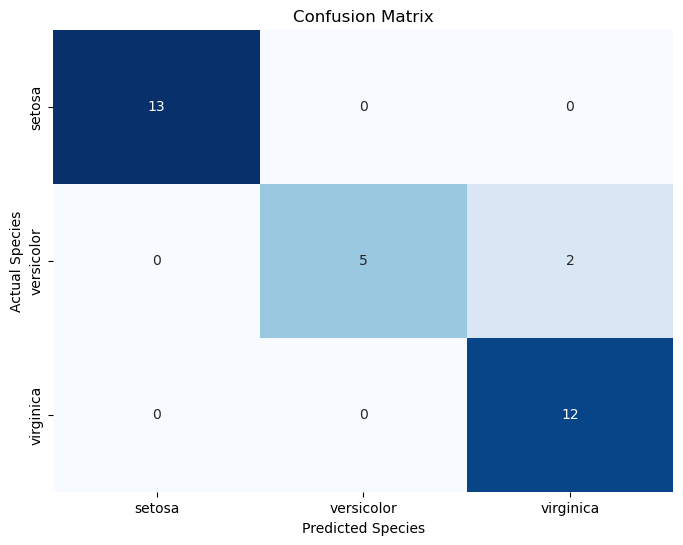

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Assuming you have your input data in a DataFrame
input_data = pd.DataFrame([[5.0, 3.6, 1.4, 2.0], [5.0, 3.6, 1.4, 2.0]], columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

# Now, you can use these feature names for predictions
preds = iris.target_names[rf.predict(input_data)]
preds

array(['setosa', 'setosa'], dtype='<U10')